[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
X matrix dimensionality: (150, 4)
Y vector dimensionality: (150,)
[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]
0.966666666667
[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.9599

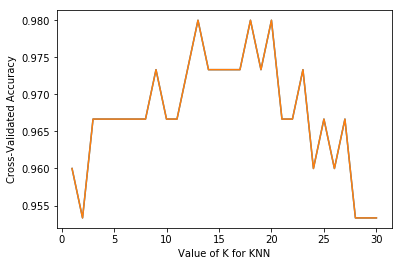

In [9]:
# imports 
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

# read in the iris data
iris = load_iris()

print(iris.target)

# create X (features) and y (response)
X = iris.data
y = iris.target

print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', y.shape)

# 10-fold (cv=10) cross-validation with K=5 (n_neighbors=5) for KNN (the n_neighbors parameter)

# instantiate model
knn = KNeighborsClassifier(n_neighbors=5)

# store scores in scores object
# scoring metric used here is 'accuracy' because it's a classification problem
# cross_val_score takes care of splitting X and y into the 10 folds 
#that's why we pass X and y entirely instead of X_train and y_train
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

# use average accuracy as an estimate of out-of-sample accuracy

# scores is a numpy array so we can use the mean method
print(scores.mean())

# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

#More efficient parameter tuning using GridSearchCV¶
#Allows you to define a grid of parameters 
#that will be searched using K-fold cross-validation
#This is like an automated version of the "for loop" above

from sklearn.grid_search import GridSearchCV

# define the parameter values that should be searched
# for python 3, k_range = range(1, 31)
k_range = list(range(1, 31))
print(k_range)

# create a parameter grid: map the parameter names to the values 
#that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

#Grid object is ready to do 10-fold cross validation on a KNN model 
#using classification accuracy as the evaluation metric
#In addition, there is a parameter grid to repeat the 10-fold cross validation 
#process 30 times
#Each time, the n_neighbors parameter should be given a different value 
#from the list
#We can't give GridSearchCV just a list
#We've to specify n_neighbors should take on 1 through 30
#You can set n_jobs = -1 to run computations in parallel 
#(if supported by your computer and OS)
#This is also called parallel programming

# fit the grid with data
grid.fit(X, y)

#Remember this is running 10-fold validation 30 times

#KNN model is being fit and predictions are being made 30 x 10 = 300 times

# view the complete results (list of named tuples)
grid.grid_scores_

#List of 30 named tuples

#First tuple
#When n_neighbors = 1
#Mean of accuracy scores = 0.96
#Standard deviation of accuracy scores = 0.053
#If SD is high, the cross-validated estimate of the accuracy 
#might not be as reliable
#There is one tuple for each of the 30 trials of CV

# examine the first tuple
# we will slice the list and select its elements using dot notation and []


print('Parameters')
print(grid.grid_scores_[0].parameters)

# Array of 10 accuracy scores during 10-fold cv using the parameters
print('')
print('CV Validation Score')
print(grid.grid_scores_[0].cv_validation_scores)

# Mean of the 10 scores
print('')
print('Mean Validation Score')
print(grid.grid_scores_[0].mean_validation_score)

# create a list of the mean scores only
# list comprehension to loop through grid.grid_scores
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

# plot the results
# this is identical to the one we generated above
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

#4. Searching multiple parameters simultaneously
#Example: tuning max_depth and min_samples_leaf for a DecisionTreeClassifier
#Could tune parameters independently: change max_depth while leaving min_samples_leaf at its default value, and vice versa
#But, best performance might be achieved when neither parameter is at its default value

# define the parameter values that should be searched
k_range = list(range(1, 31))

# Another parameter besides k that we might vary is the weights parameters
# default options --> uniform (all points in the neighborhood are weighted equally)
# another option --> distance (weights closer neighbors more heavily than further neighbors)

# we create a list
weight_options = ['uniform', 'distance']

# create a parameter grid: map the parameter names to the values that should be searched
# dictionary = dict(key=values, key=values)
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

# instantiate and fit the grid
# exhaustive grid-search because it's trying every combination
# 10-fold cross-validation is being performed 30 x 2 = 60 times

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

# view the complete results
grid.grid_scores_

# examine the best model
print(grid.best_score_)
print(grid.best_params_)

# Best score did not improve for this model


from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)